# Feedback
## Exercise 1
Super bien! 6/6

## Exercise 2
No entendieren bien lo que había que hacer aquí. La kernel PCA no tiene *nada* que ver con lo que nosotros vimos (solo es que usa un kernel para identificar los componentes principales).

1. correct application of feature map to compute the kernel matrix: No. 0.25/1
2. correct application of feature map to compute the inputs for the grid predictions: no, you don't map the data at all here 0/1
3. correct translation of scores into the array Z: ok. 1/1
4. discussion: ok 1/1

Total: 6 + 0.25 + 0 + 1 + 1 = 8.25/10

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
import sklearn.metrics
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from future.utils import iteritems
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [ ]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

import sklearn.tree
import pandas as pd
import sklearn.datasets
import random
from random import seed
from random import randint
import numpy as np
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA

In [ ]:
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import sklearn.svm
import sklearn.neighbors
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split

#**Exercise 1 (6 points)**

Write a function optimize_svm(X, y) that tries to find the best
configuration for an SVM (SVC) using all the four pre-implemented kernels. Some of the
kernels have additional hyperparameters in scikit-learn (we consider C, degree, and sigma).
To this end, do the following:
1. We want to choose C and sigma on a log-scale, i.e., as values 10i
for values of i ∈
{−5, −4, .., 5} Degree should be chosen as an integer between 2 and 5. Create three
tuples vi = (namei
, valsi) where namei
is a string of the hyperparameter as expected by
scikit-learn, and valsi
is a list of the possible values considered for this hyperparameter
(as described above).
2. Next create a dictionary, where you specify, for each kernel, a list containing all the vi
relevant for that kernel.
3. Now iterate over all the kernels, and do the following:
a) Within the loop, run in an inner loop over all the possible hyperparameter configurations for this kernel (hint: check itertools.product for this and the usage of
function(*varname) in python).
b) For a concrete combination of values for the hyperparameters, prepare a dictionary
with the names and values (here you need to use the namei from the descriptions
above). Then run a cross-validation for an SVC with these hyperparameters (hint:
check the usage of the function(**dictionary) in python).
c) check whether the validation score (accuracy) is the best seen so far, and if so,
memorize the used kernel and other hyperparameters.
This can generally take a while, because in this setup, you will look at 616 possible
hyperparameter configurations.
4. Which is the best hyperparameter configuration for iris, breast-cancer, digits, and wine,
respectively?
Report the accuracy of those configurations compared to what you get using the default
hyperparameters of scikit-learn

In [ ]:
def optimize_svm(X, y):
    model_svc = sklearn.svm.SVC()
    dfx=pd.DataFrame()
    v1 = ("C", [10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3,10e4,10e5])
    v2 = ("degree", [2,3,4,5])
    v3 = ("gamma", [10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3,10e4,10e5])
    for krn in ('linear', 'poly', 'rbf', 'sigmoid'):
        if krn=="linear":
            param_grid=dict([v1])
        elif krn=="poly":
            param_grid=dict([v1, v2,v3])
        elif krn=="rbf":
            param_grid=dict([v1,v3])
        elif krn=="sigmoid":
            param_grid=dict([v1,v3])
        print(f"Con el kernel {krn} tenemos {len(param_grid)} parametros a optimizar")
        grid_svc = sklearn.model_selection.GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=10, scoring="accuracy")
        grid_svc.fit(X, y)
        dfk = pd.DataFrame(grid_svc.cv_results_)
        dfk["kernel"]=krn
        print(f"La cantidad de combinaciones posibles para el kernel {krn} son: {len(dfk)}")
        dfx=pd.concat([dfx,dfk])
    dfx = dfx.reset_index(drop=True)
    dfx = dfx.sort_values(by=["mean_test_score"], ascending = False)  
    kernel_o=dfx[["kernel","params","mean_test_score"]].iloc[0][0]
    parametros=dfx[["kernel","params","mean_test_score"]].iloc[0][1]
    Accura=dfx[["kernel","params","mean_test_score"]].iloc[0][2]
    print(f"The best kernel is: {kernel_o}, using the params: {parametros} with accuray {Accura}")
    return dfx

**Iris**

In [ ]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
iris_X=pd.DataFrame(data=iris_X)
df=iris_X.copy()
df["target"]=iris_y
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(iris_X, iris_y, test_size = 0.20)
resultadoi=optimize_svm(X_train_i, y_train_i)

Con el kernel linear tenemos 1 parametros a optimizar
La cantidad de combinaciones posibles para el kernel linear son: 11
Con el kernel poly tenemos 3 parametros a optimizar
La cantidad de combinaciones posibles para el kernel poly son: 484
Con el kernel rbf tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel rbf son: 121
Con el kernel sigmoid tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel sigmoid son: 121
The best kernel is: sigmoid, using the params: {'C': 1.0, 'gamma': 0.1} with accuray 0.9833333333333332


In [ ]:
svclassifier = SVC().fit(X_train_i, y_train_i)
y_pred = svclassifier.predict(X_test_i)
print(f"Accuracy Score for defaul svm {round(accuracy_score(y_test_i,y_pred)*100, 4)}%")

Accuracy Score for defaul svm 93.3333%


**Breast**

In [ ]:
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]
breast_X=pd.DataFrame(data=breast_X)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(breast_X,breast_y, test_size = 0.20)
resultado=optimize_svm(breast_X,breast_y)

Con el kernel linear tenemos 1 parametros a optimizar
La cantidad de combinaciones posibles para el kernel linear son: 11
Con el kernel poly tenemos 3 parametros a optimizar
La cantidad de combinaciones posibles para el kernel poly son: 484
Con el kernel rbf tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel rbf son: 121
Con el kernel sigmoid tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel sigmoid son: 121
The best kernel is: linear, using the params: {'C': 10000.0} with accuray 0.9560776942355889


In [ ]:
svclassifier = SVC().fit(X_train_b, y_train_b)
y_pred = svclassifier.predict(X_test_b)
print(f"Accuracy Score for defaul svm {round(accuracy_score(y_test_b,y_pred)*100, 4)}%")

Accuracy Score for defaul svm 86.8421%


**Digits**

In [ ]:
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
digits_X=pd.DataFrame(data=digits_X)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(digits_X,digits_y, test_size = 0.20)
resultado=optimize_svm(digits_X,digits_y)

Con el kernel linear tenemos 1 parametros a optimizar
La cantidad de combinaciones posibles para el kernel linear son: 11
Con el kernel poly tenemos 3 parametros a optimizar
La cantidad de combinaciones posibles para el kernel poly son: 484
Con el kernel rbf tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel rbf son: 121
Con el kernel sigmoid tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel sigmoid son: 121
The best kernel is: linear, using the params: {'C': 1000000.0} with accuray 0.9816263190564867


In [ ]:
svclassifier = SVC().fit(X_train_d, y_train_d)
y_pred = svclassifier.predict(X_test_d)
print(f"Accuracy Score for defaul svm {round(accuracy_score(y_test_d,y_pred)*100, 4)}%")

Accuracy Score for defaul svm 96.9444%


**Wine**

In [ ]:
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]
wine_X=pd.DataFrame(data=wine_X)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine_X,wine_y, test_size = 0.20)
resultado=optimize_svm(wine_X,wine_y)

Con el kernel linear tenemos 1 parametros a optimizar
La cantidad de combinaciones posibles para el kernel linear son: 11
Con el kernel poly tenemos 3 parametros a optimizar
La cantidad de combinaciones posibles para el kernel poly son: 484
Con el kernel rbf tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel rbf son: 121
Con el kernel sigmoid tenemos 2 parametros a optimizar
La cantidad de combinaciones posibles para el kernel sigmoid son: 121
The best kernel is: linear, using the params: {'C': 1000000.0} with accuray 0.961111111111111


In [ ]:
svclassifier = SVC().fit(X_train_w, y_train_w)
y_pred = svclassifier.predict(X_test_w)
print(f"Accuracy Score for defaul svm {round(accuracy_score(y_test_w,y_pred)*100, 4)}%")

Accuracy Score for defaul svm 63.8889%


Data Ingestion

In [ ]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]

In [ ]:
labels_i= dfs.load_iris().target_names
labels_w= dfs.load_wine().target_names
labels_d= dfs.load_digits().target_names
labels_b= dfs.load_breast_cancer().target_names

#**Exercise 2(4 points)**

In this exercise, we modify the solution to the function plot_belief_model
from sheet 2.2. Add a new parameter kernel = None to the function.

1. If kernel is not provided, the function should just behave as before.
2. If provided, kernel should be a function that receives two vectors and computes a number. In that case, after the PCA projection of the original data create the kernel matrix, i.e., the matrix that contains for each pair of data points (in the 2D data) the kernel value. The learner should now be trained on those data instead of the original PCA data.

In the step of computing the matrix Z, don’t use the original data in M1 M2 Instead, for such a point (m1;m2), compute the landmark values kernel((m1,m2), (xi1 ; xi2)) with all datapoints xi in the PCA data of X. This way, the 2D point (m1;m2) is transformed into a n-dimensional point, where n is the number of datapoints in X. Obtain the predicted probabilities (of the positive class from the trained learner for all these (now n-dimensional) points.

3. apply your function with logistic regression to every 2-class (1-vs-rest) version of iris (3 cases), wine (3 cases), breast-cancer (1 case), and digit (10 cases). Once without kernel and once using a standard RBF kernel (you might want to implement that function yourself, i.e., f(x; y) = exp(kx yk2). Can you observe any difference? Is logistic regression now also able to learn non-linear models in the original data?

1.1

In [ ]:
def my_kernel_test(X, Y):
  M = np.array([[2,0], [0, 1.0]])
  return np.dot(np.dot(X, M), Y.T)

In [ ]:
def  plot_belief_model(l, X, y ,xlabel ,ylabel ,n, kernel):

    X, X_test, y, y_test = sklearn.model_selection.train_test_split(X, y)
    scaled_features = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)

    if kernel == None:      F
      
      X = pca.fit_transform(scaled_features)

    else:

      X_pca = pca.fit_transform(scaled_features)
      kpca = KernelPCA(kernel ='rbf', gamma = 15, n_components=2)
      X = kpca.fit_transform(X)


    X = X[:n]
    y = y[:n]

    min1, max1 = X[:, 0].min(), X[:, 0].max() 
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    x1_scale = np.arange(min1, max1, 0.1)
    x2_scale = np.arange(min2, max2, 0.1)
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
    grid = np.hstack((x_g, y_g))
    n_classes = np.unique(y).size

    z_axis = np.ones((n,1))*0.5

    l.fit(X, y)
    y_pred = l.predict(X)
    p_pred_ = l.predict_proba(grid)
    p_pred_array = np.array(p_pred_)

    for i in range(n_classes) :


        p_pred = p_pred_[:, i]
        pp_grid = p_pred.reshape(x_grid.shape)
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(  projection='3d', )

        # Wireframe
        ax.plot_wireframe(x_grid, y_grid, pp_grid, rstride=2, cstride=2, cmap='Set1')
        ax.set_title( "Clase %d" % i)
        
        #scatter
        plt.scatter(X[:, 0], X[:, 1], cmap='Set1', c = y_pred,  s=25)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel("Pred Probability")



        plt.show()

2.3

Iris (Case 1A)




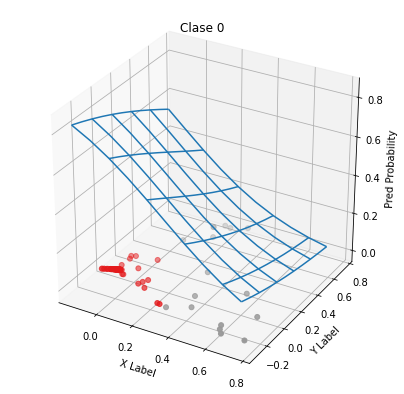

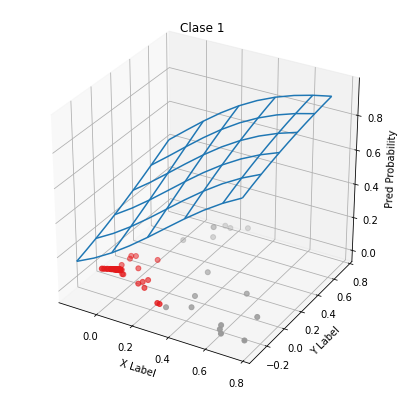

In [ ]:
iris_bin_y = iris_y == 0 
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= "Yes")

Iris (Case 1B)

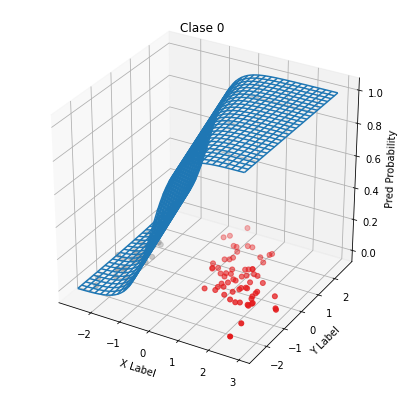

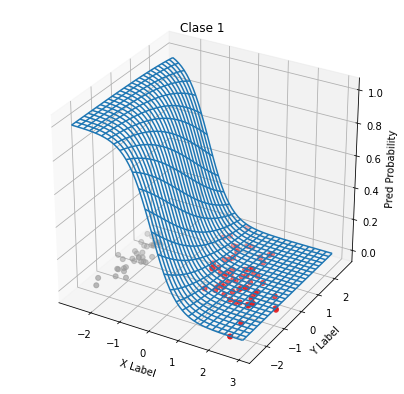

In [ ]:
iris_bin_y = iris_y == 0
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Iris (Case 2A)

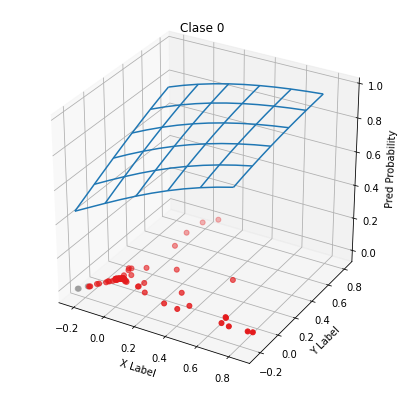

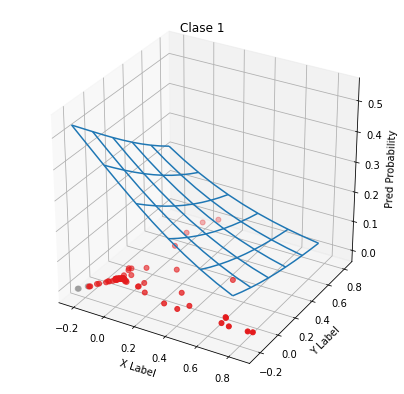

In [ ]:
iris_bin_y = iris_y == 1
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= "Yes")

Iris (Case 2B)

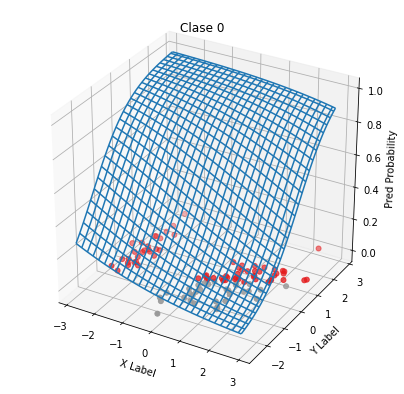

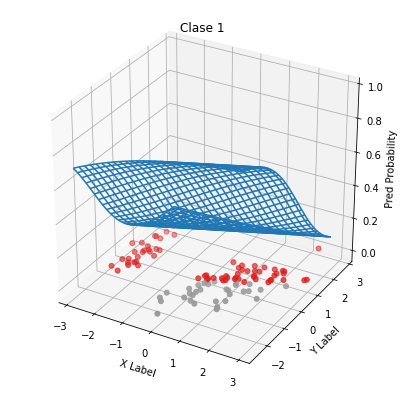

In [ ]:
iris_bin_y = iris_y == 1
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Iris (Case 3A)

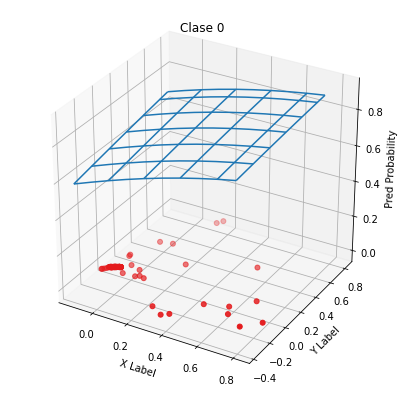

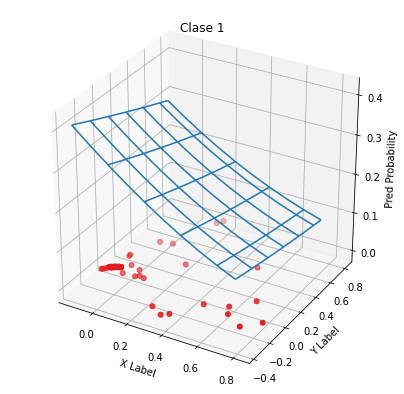

In [ ]:
iris_bin_y = iris_y == 1
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= "Yes")

Iris (Case 3B)

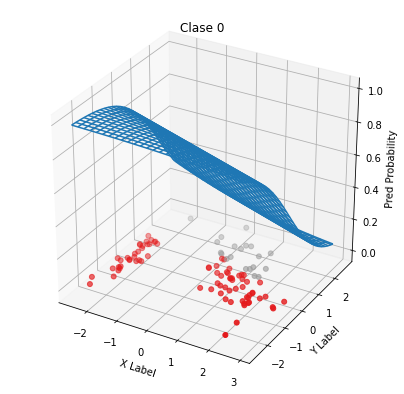

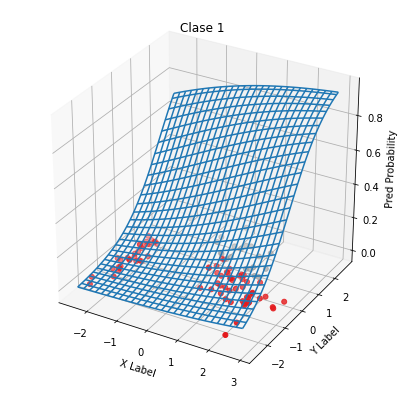

In [ ]:
iris_bin_y = iris_y == 1
plot_belief_model(LogisticRegression(), iris_X, iris_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

WINE (Case 1 A)

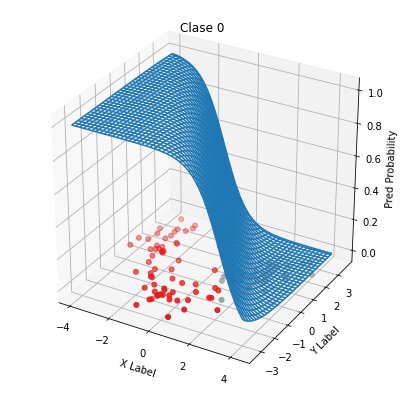

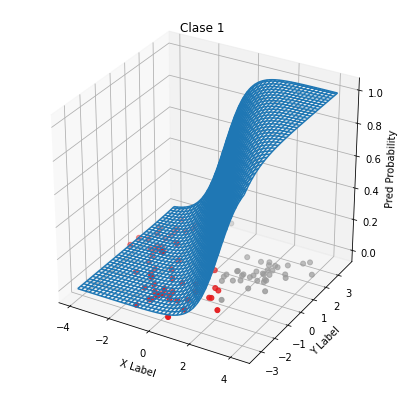

In [ ]:
wine_bin_y = wine_y == 0
plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Wine (Case 1B ) 

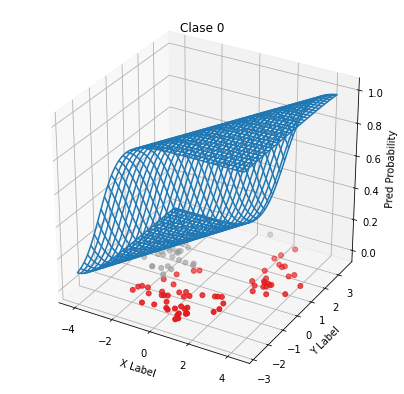

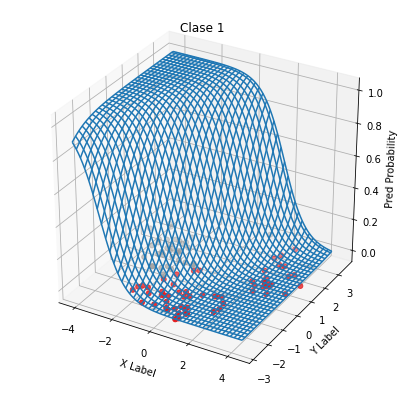

In [ ]:
wine_bin_y = wine_y == 0
plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Wine (Case 2A )

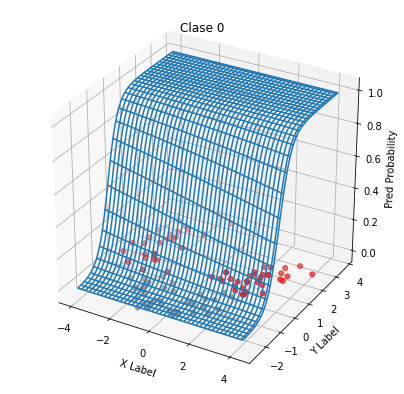

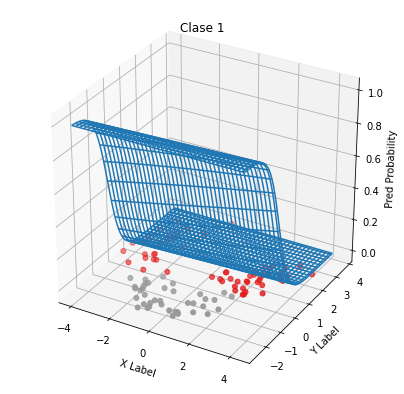

In [ ]:
wine_bin_y = wine_y == 1
plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Wine (Case 2B )

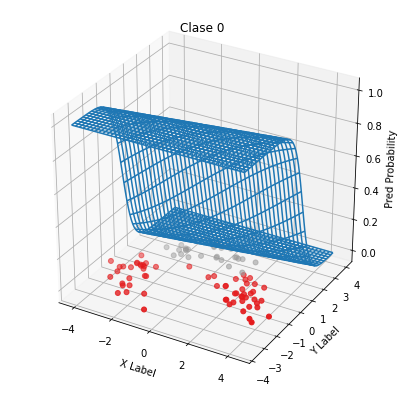

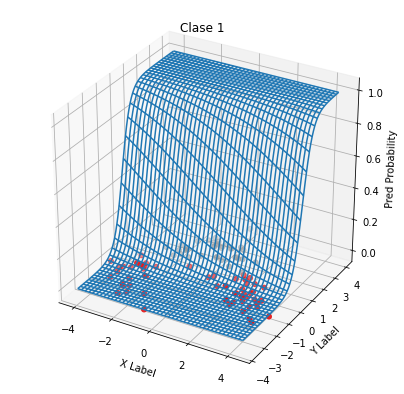

In [ ]:
wine_bin_y = wine_y == 1
plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Wine (Case 3A)

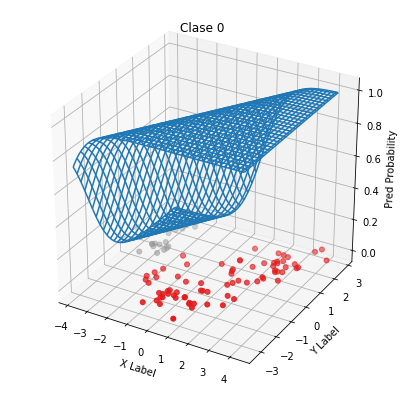

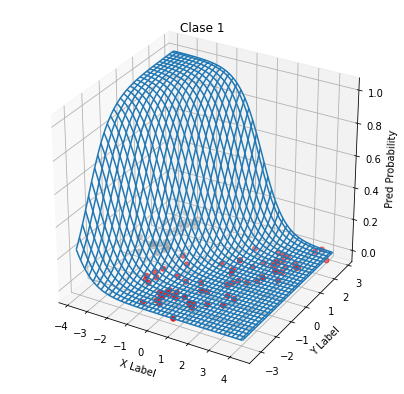

In [ ]:
wine_bin_y = wine_y == 2
plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= None)

Wine (Case 3B)

In [ ]:
wine_bin_y = wine_y == 2
#plot_belief_model(LogisticRegression(), wine_X, wine_bin_y ,"X Label" ,"Y Label" , 100, kernel= "Yes")

Breast (Case 1A)

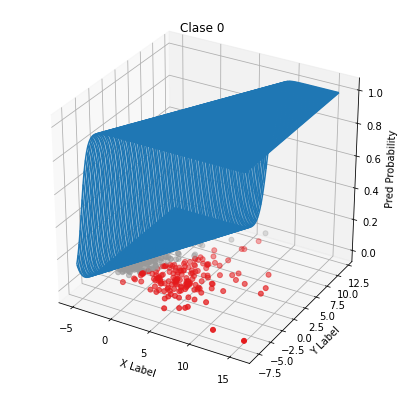

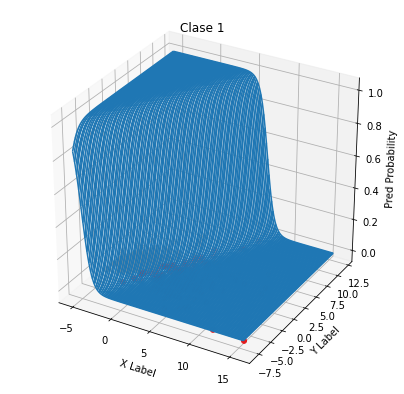

In [ ]:
plot_belief_model(LogisticRegression(), breast_X, breast_y ,"X Label" ,"Y Label" , 500, kernel= None)

Breast (Case 1B)

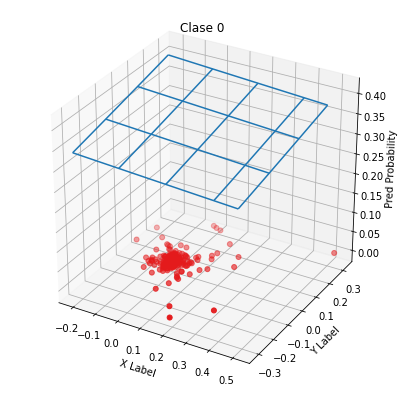

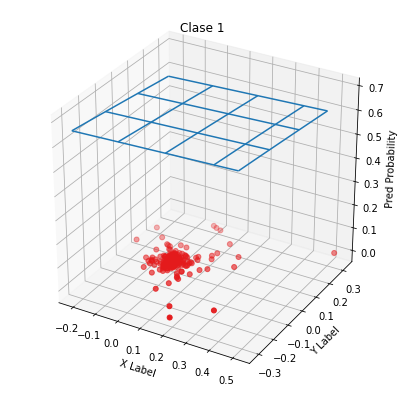

In [ ]:
plot_belief_model(LogisticRegression(), breast_X, breast_y ,"X Label" ,"Y Label" , 500, kernel= "Yes")

Digits (Case 1 to 10 with Kernel)

0


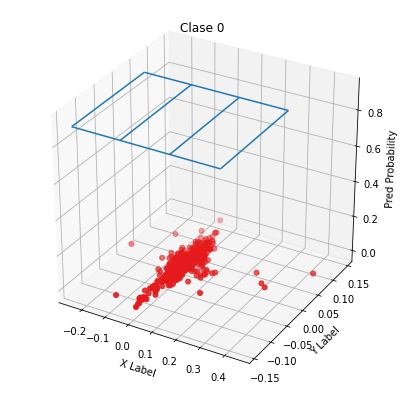

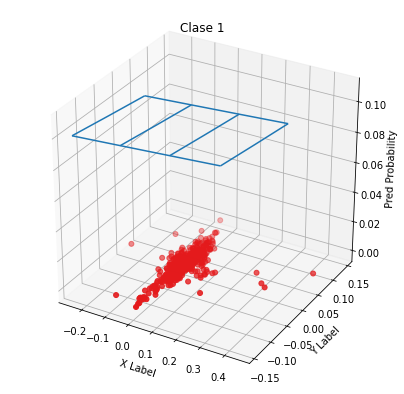

1


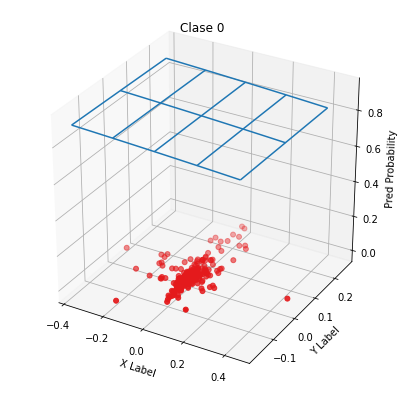

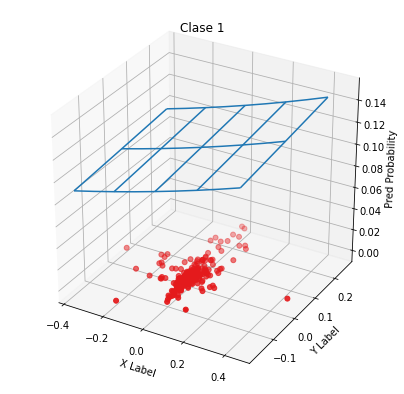

2


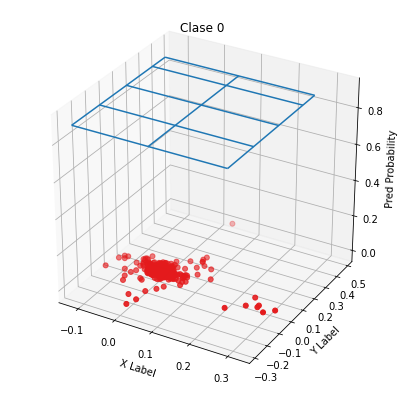

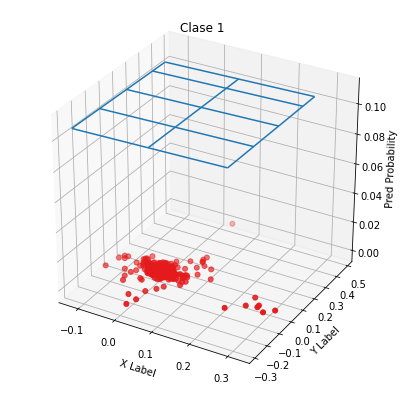

3


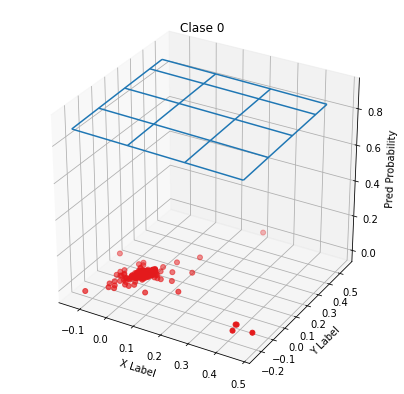

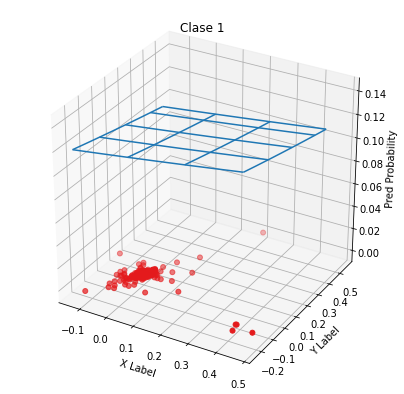

4


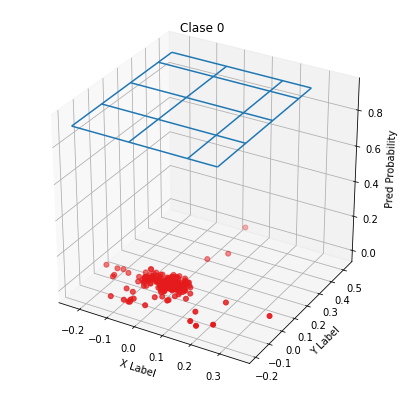

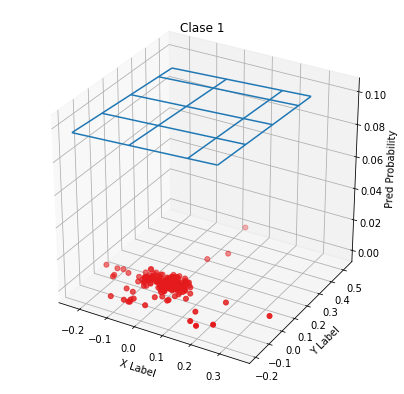

5


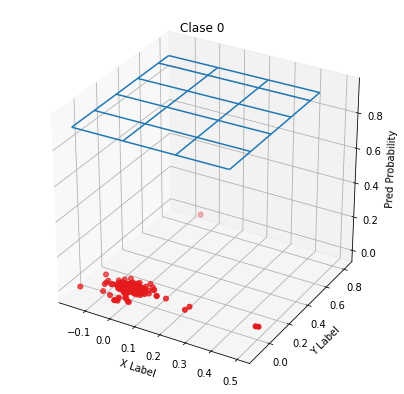

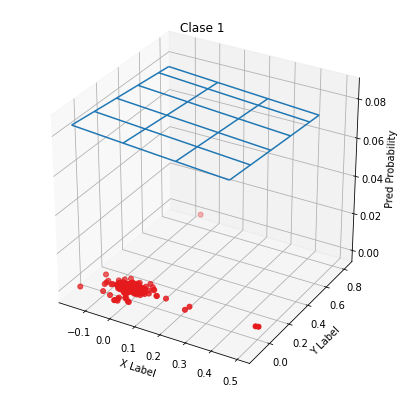

6


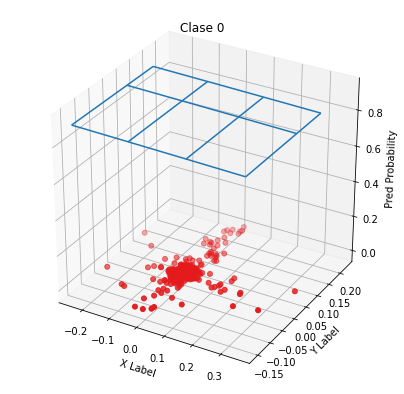

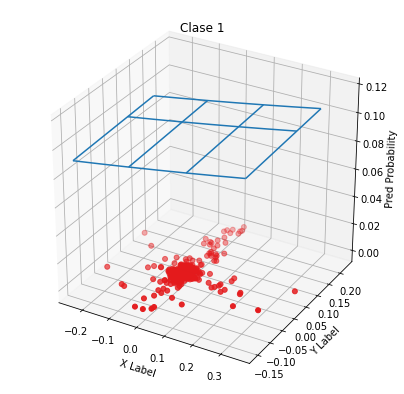

7


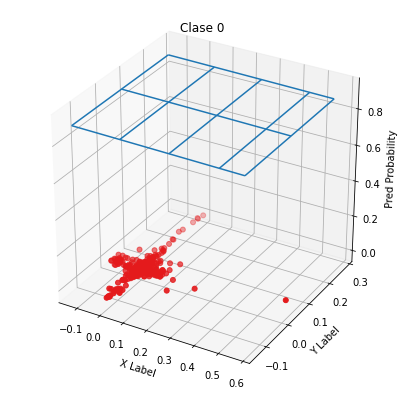

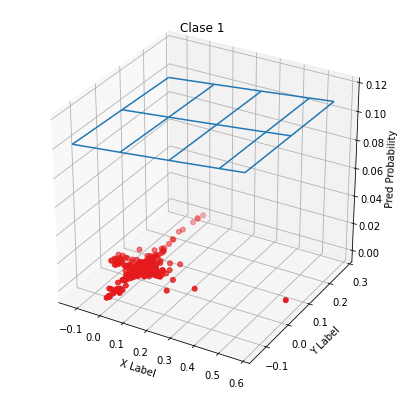

8


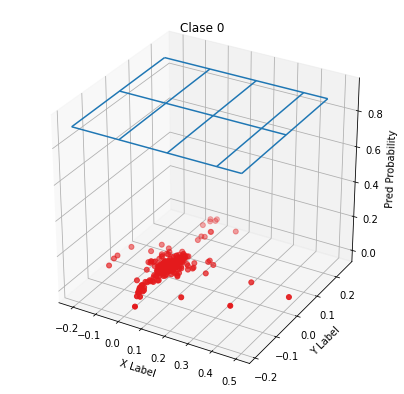

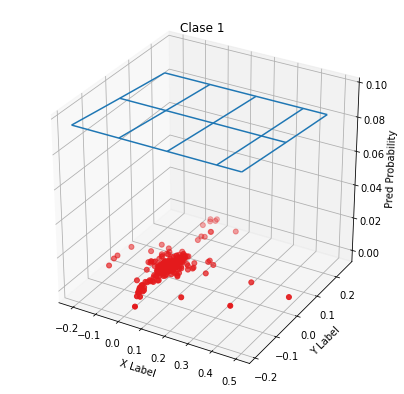

In [ ]:
for i in range (0, 9):
  digits_bin_y = digits_y == i
  print(i)
  plot_belief_model(LogisticRegression(), digits_X, digits_bin_y ,"X Label" ,"Y Label" , 1000, kernel= "Yes")

Digits (Case 1 to 10 without Kernel)

0


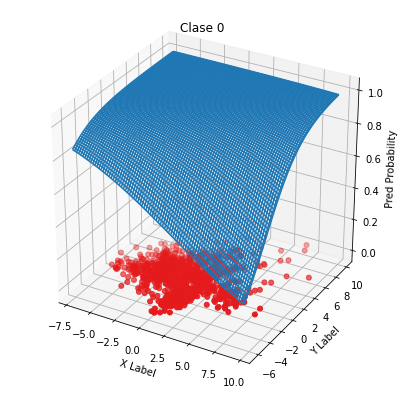

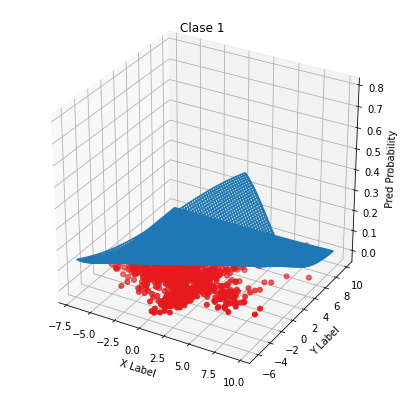

1


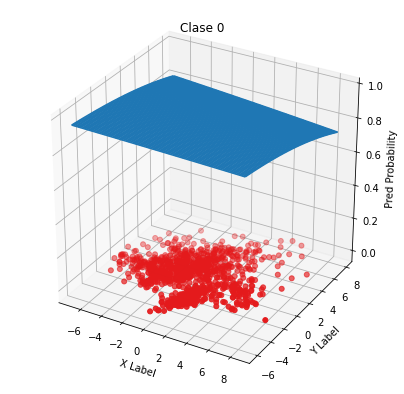

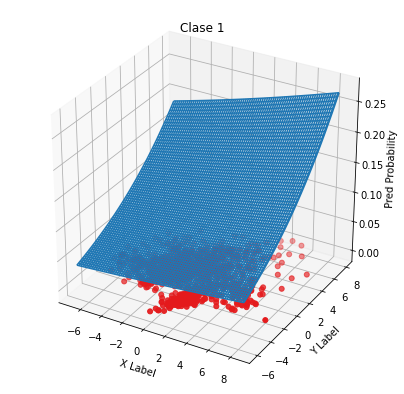

2


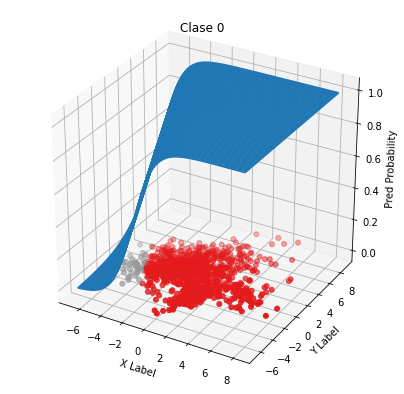

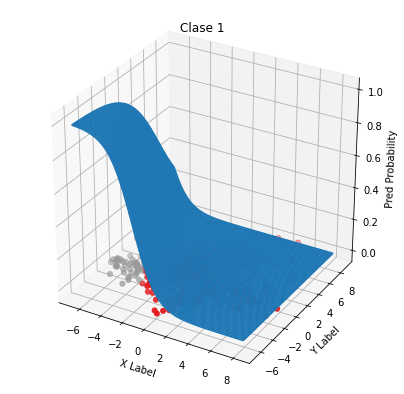

3


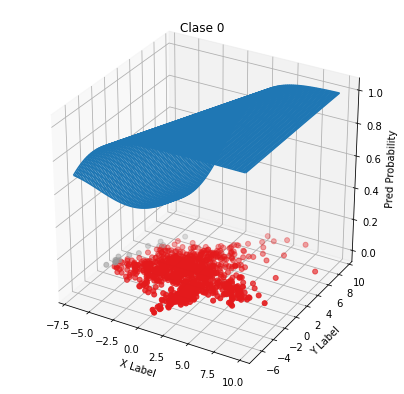

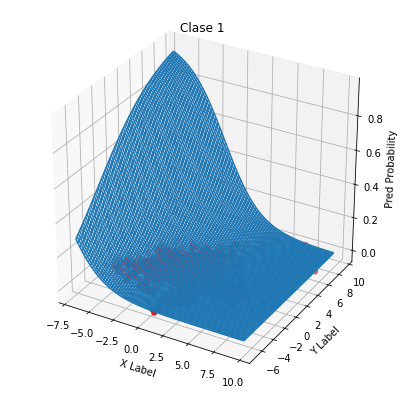

4


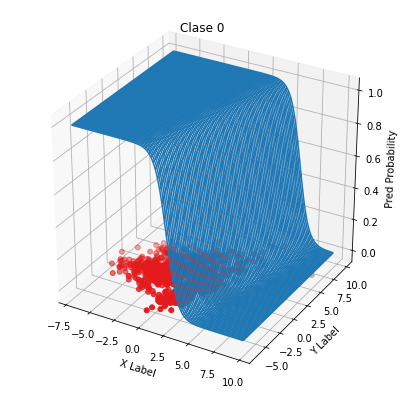

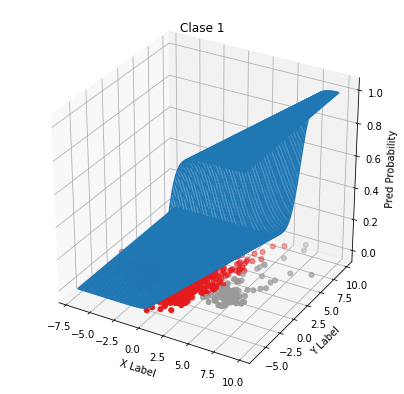

5


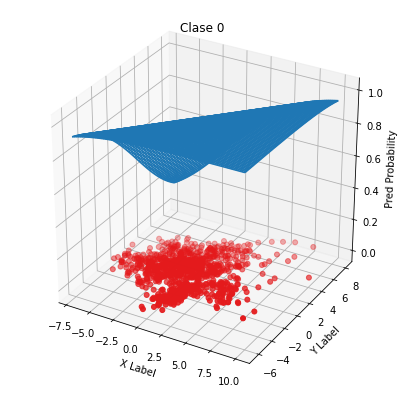

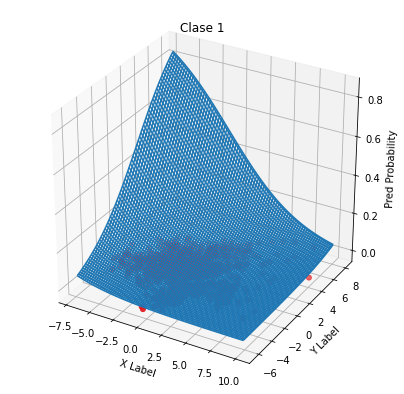

6


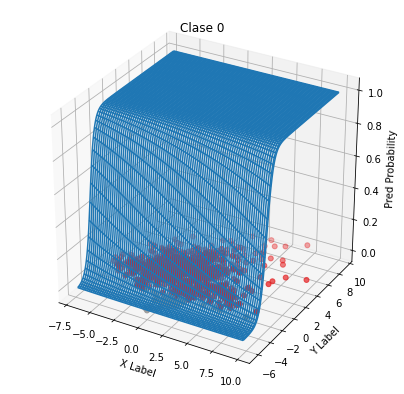

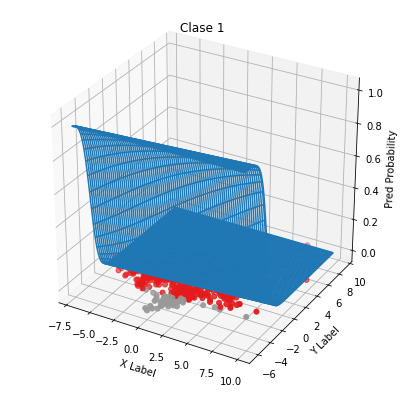

7


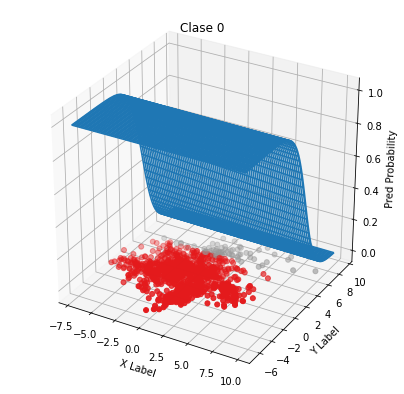

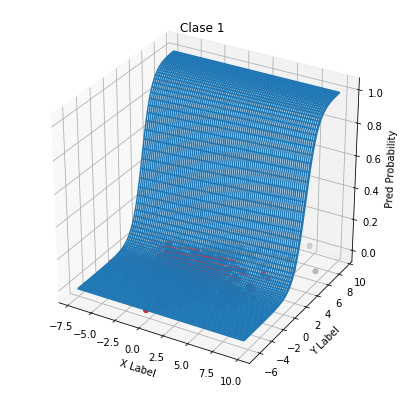

8


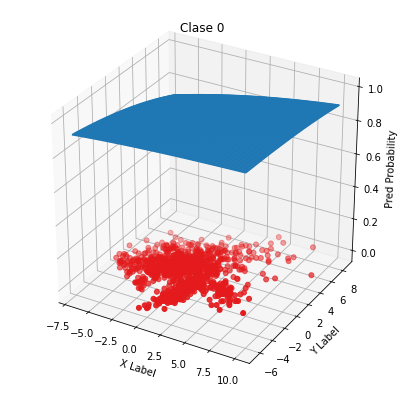

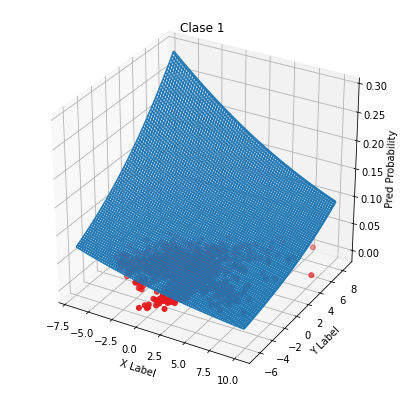

In [ ]:
for i in range (0, 9):

  digits_bin_y = digits_y == i
  print(i)
  plot_belief_model(LogisticRegression(), digits_X, digits_bin_y ,"X Label" ,"Y Label" , 1000, kernel= None)

Can you observe any difference? Is logistic
regression now also able to learn non-linear models in the original data?

Usando la regresión logística con este Kernel en realidad estamos aplicando a nuestro nuestro algoritmo a un nuevo punto de datos de dimensión infinita. Por lo tanto, dará un hiperplano en infinitas dimensiones, lo que resulta en un clasificador no lineal con buen accuracy o una curva de regresión después de volver a nuestras dimensiones originales.

En conclusión, aunque estamos aplicando una regresión logística, el resultado se acerca mucho a un clasificador no lineal o una línea de regresión, que será un polinomio de potencia infinita. Y al ser un polinomio de potencia infinita, el núcleo RB propio de este Kernel permite generar una curva que se ajuste a cualquier conjunto de datos, aprendiendo modelos no lineales.